## Correlation_F

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flushing_Meadow_Park_without_Night.csv to Flushing_Meadow_Park_without_Night.csv


In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
Xtable = pd.read_csv("Flushing_Meadow_Park_without_Night.csv")
Xtable

,Date,Month,Time,Visits,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,non_water_area,Weekday,...,Rainy,Windy,non_windy,Large_Event,Small_Event,non_event,Athletic_Zone,Plaza_Zone,Recreation_Zone,Water_Front_Zone
0,2024/4/1,4,6,21.215998,0,1,0,0,1,1,...,0,0,1,0,0,1,1,0,0,0
1,2024/4/1,4,7,77.084792,0,1,0,0,1,1,...,0,0,1,0,0,1,1,0,0,0
2,2024/4/1,4,8,165.767663,0,1,0,0,1,1,...,0,0,1,0,0,1,1,0,0,0
3,2024/4/1,4,9,198.298860,0,1,0,0,1,1,...,1,0,1,0,0,1,1,0,0,0
4,2024/4/1,4,10,268.170213,0,1,0,0,1,1,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,2024/9/29,9,17,366.895180,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
11420,2024/9/29,9,18,502.511933,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
11421,2024/9/29,9,19,638.128685,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
11422,2024/9/29,9,20,473.313992,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
Xtable=Xtable.drop(columns=['Date','Month','Time'])
#,'Shaded_Area','Water_Area'

In [ ]:
Xtable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11424 entries, 0 to 11423
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Visits                11424 non-null  float64
 1   Shaded_Area_Minimal   11424 non-null  int64  
 2   Shaded_Area_Partial   11424 non-null  int64  
 3   Shaded_Area_Fully     11424 non-null  int64  
 4   Water_Area            11424 non-null  int64  
 5   non_water_area        11424 non-null  int64  
 6   Weekday               11424 non-null  int64  
 7   Weekend               11424 non-null  int64  
 8   Summer                11424 non-null  int64  
 9   non-summer            11424 non-null  int64  
 10  Morning               11424 non-null  int64  
 11  Afternoon             11424 non-null  int64  
 12  Evening               11424 non-null  int64  
 13  Extreme               11424 non-null  int64  
 14  Hot                   11424 non-null  int64  
 15  Average            

In [ ]:
Xtable.columns

Index(['Visits', 'Shaded_Area_Minimal ', 'Shaded_Area_Partial ',
       'Shaded_Area_Fully', 'Water_Area', 'non_water_area', 'Weekday',
       'Weekend', 'Summer', 'non-summer', 'Morning', 'Afternoon', 'Evening',
       'Extreme', 'Hot', 'Average', 'Cool', 'Clear', 'Cloudy', 'Rainy',
       'Windy', 'non_windy', 'Large_Event', 'Small_Event', 'non_event',
       'Athletic_Zone', 'Plaza_Zone', 'Recreation_Zone', 'Water_Front_Zone'],
      dtype='object')

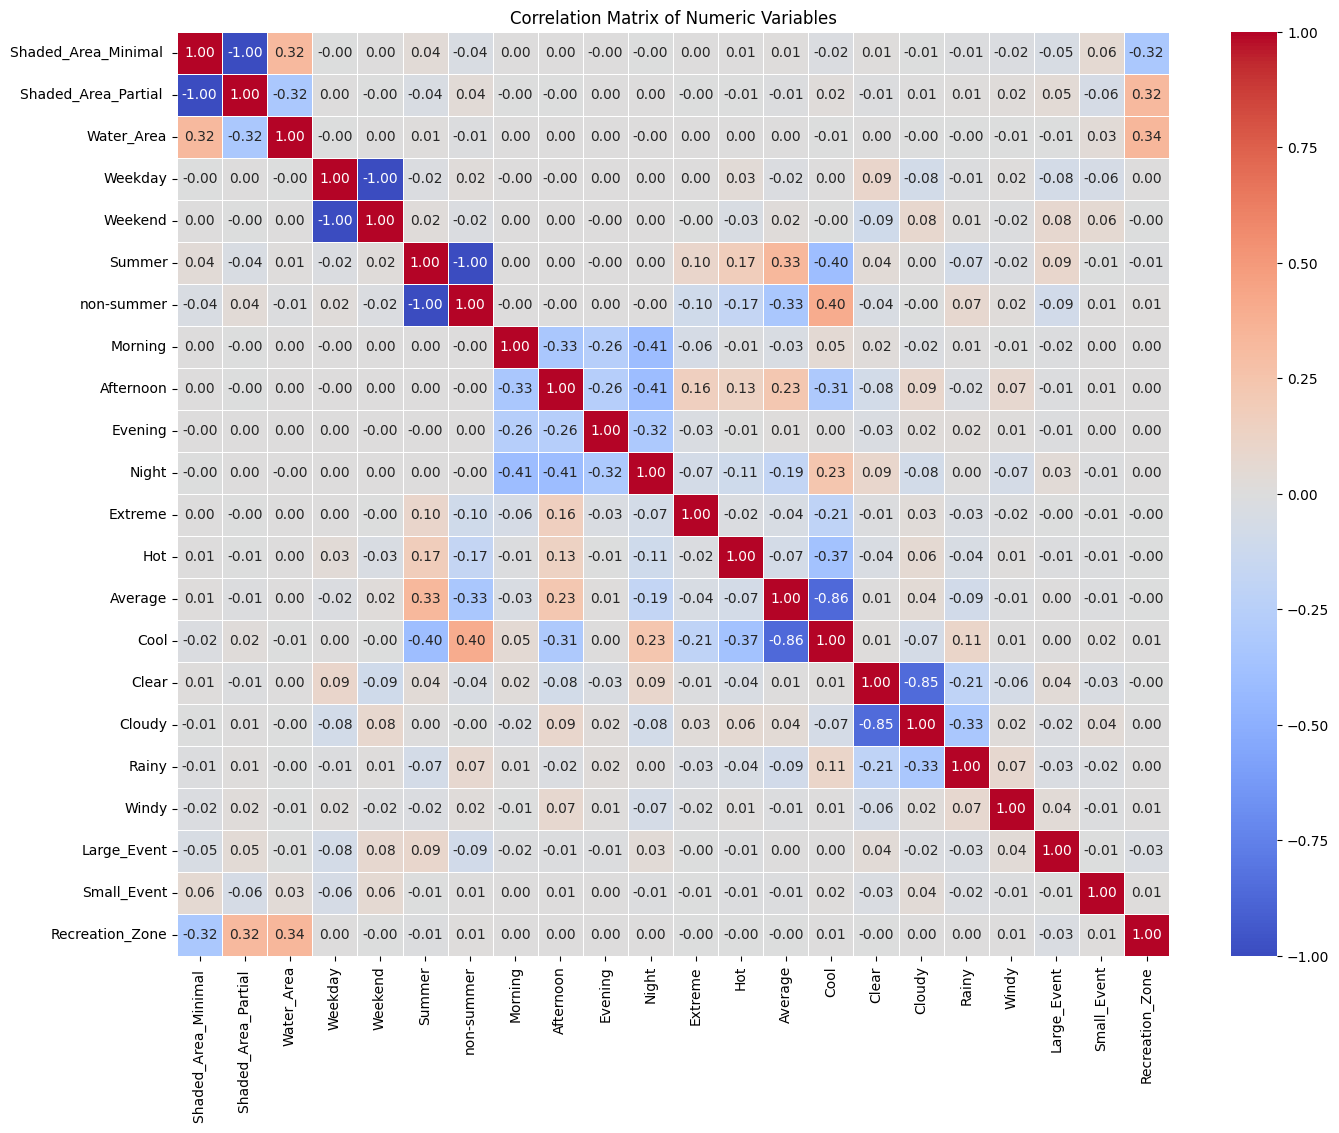

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xtable1=Xtable.drop(columns=['Athletic_Zone', 'Plaza_Zone','Water_Front_Zone', 'Shaded_Area_Fully','Visits', 'Z_Score_row'])

# 选择数值型变量进行相关性计算
numeric_cols = Xtable1.select_dtypes(include=[np.number])

# 计算相关性矩阵
correlation_matrix = numeric_cols.corr()

# 绘制相关性热图
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


In [ ]:
Xtable = Xtable.rename(columns={'Shaded_Area_Minimal ': 'Shaded_Area_Minimal'})
Xtable = Xtable.rename(columns={'Shaded_Area_Partial ': 'Shaded_Area_Partial'})

In [ ]:
Xtable.columns

Index(['Visits', 'Shaded_Area_Minimal', 'Shaded_Area_Partial',
       'Shaded_Area_Fully', 'Water_Area', 'non_water_area', 'Weekday',
       'Weekend', 'Summer', 'non-summer', 'Morning', 'Afternoon', 'Evening',
       'Extreme', 'Hot', 'Average', 'Cool', 'Clear', 'Cloudy', 'Rainy',
       'Windy', 'non_windy', 'Large_Event', 'Small_Event', 'non_event',
       'Athletic_Zone', 'Plaza_Zone', 'Recreation_Zone', 'Water_Front_Zone'],
      dtype='object')

## Correlation_P

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prospect_Park.csv to Prospect_Park.csv


In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
XtableP = pd.read_csv("Prospect_Park.csv")
XtableP

,Date,Month,Time,Visits,Z_Score_row,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,Weekday,...,Rainy,Windy,Large_Event,Small_Event,Athletic_Zone,Entrance_Zone,Lakeside_Zone,Meadows_Zone,Trail_Zone,Villa_Green_Zone
0,2024/4/1,4,0,3.474330,-1.03,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2024/4/1,4,1,3.474330,-0.96,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2024/4/1,4,2,3.474330,-0.71,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2024/4/1,4,3,6.042313,-0.47,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2024/4/1,4,4,6.042313,-0.38,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26203,2024/9/29,9,19,131.940193,-0.57,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
26204,2024/9/29,9,20,98.130519,-0.53,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
26205,2024/9/29,9,21,66.073175,-0.52,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
26206,2024/9/29,9,22,40.509763,-0.50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
XtableP=XtableP.drop(columns=['Date','Month','Time'])
#,'Shaded_Area','Water_Area'

In [ ]:
XtableP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26208 entries, 0 to 26207
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Visits               26208 non-null  float64
 1   Z_Score_row          26208 non-null  float64
 2   Shaded_Area_Minimal  26208 non-null  int64  
 3   Shaded_Area_Partial  26208 non-null  int64  
 4   Shaded_Area_Fully    26208 non-null  int64  
 5   Water_Area           26208 non-null  int64  
 6   Weekday              26208 non-null  int64  
 7   Weekend              26208 non-null  int64  
 8   Summer               26208 non-null  int64  
 9   non-summer           26208 non-null  int64  
 10  Morning              26208 non-null  int64  
 11  Afternoon            26208 non-null  int64  
 12  Evening              26208 non-null  int64  
 13  Night                26208 non-null  int64  
 14  Extreme              26208 non-null  int64  
 15  Hot                  26208 non-null 

In [ ]:
XtableP.columns

Index(['Visits', 'Z_Score_row', 'Shaded_Area_Minimal', 'Shaded_Area_Partial',
       'Shaded_Area_Fully', 'Water_Area', 'Weekday', 'Weekend', 'Summer',
       'non-summer', 'Morning', 'Afternoon', 'Evening', 'Night', 'Extreme',
       'Hot', 'Average', 'Cool', 'Clear', 'Cloudy', 'Rainy', 'Windy',
       'Large_Event', 'Small_Event', 'Athletic_Zone', 'Entrance_Zone',
       'Lakeside_Zone', 'Meadows_Zone', 'Trail_Zone', 'Villa_Green_Zone'],
      dtype='object')

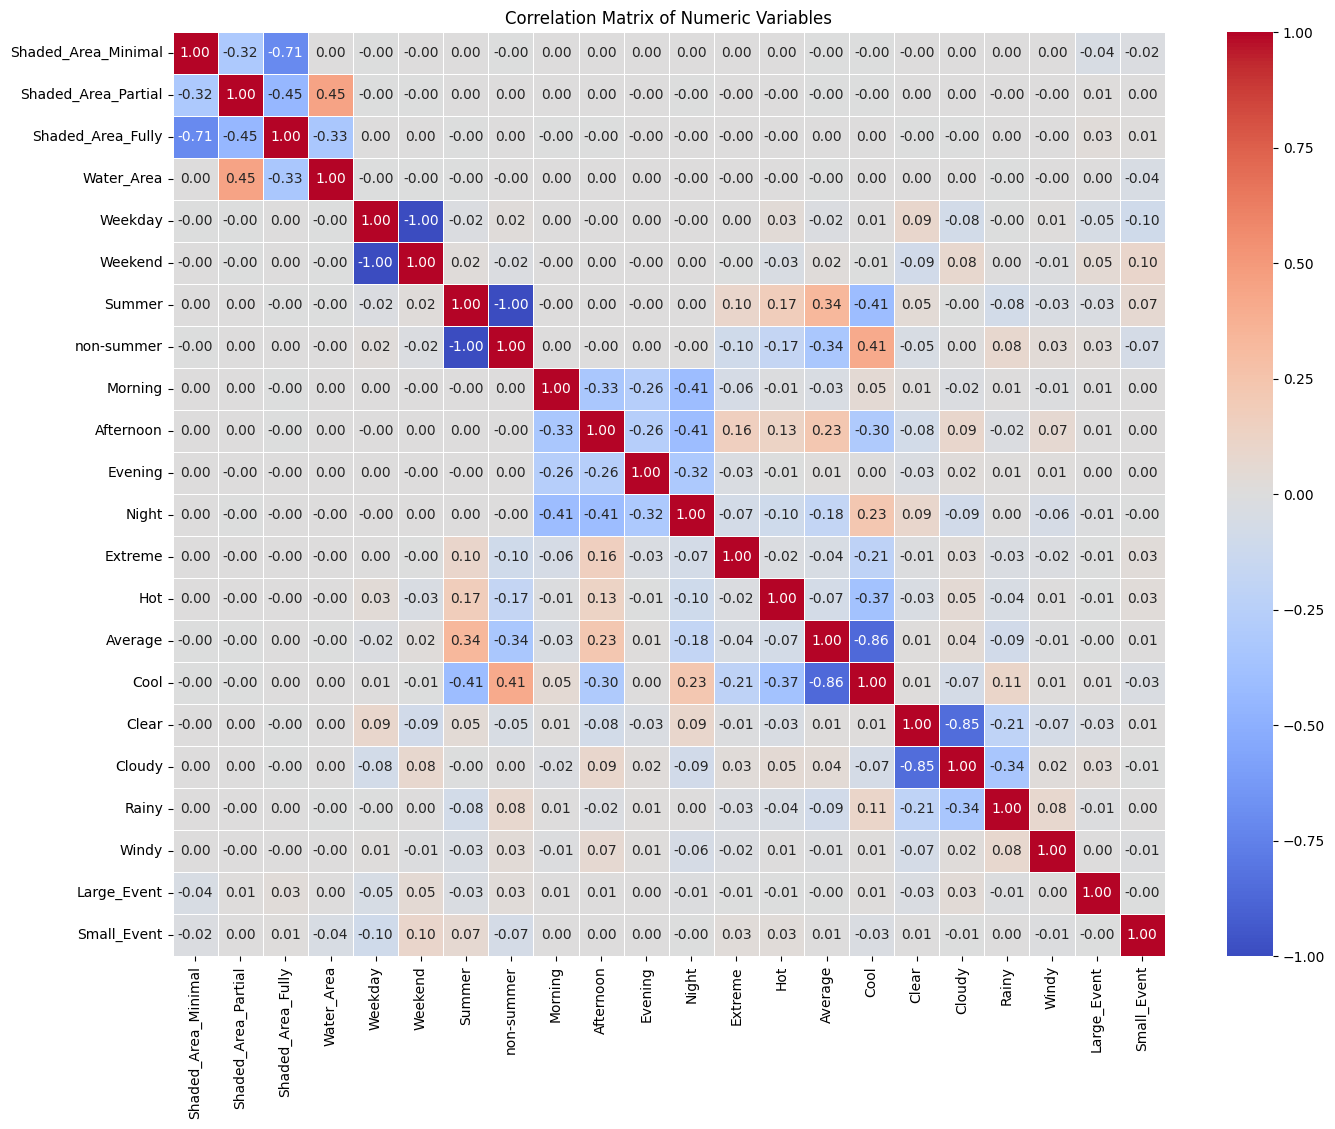

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xtable1P=XtableP.drop(columns=['Athletic_Zone',
       'Entrance_Zone', 'Lakeside_Zone', 'Meadows_Zone', 'Trail_Zone',
       'Villa_Green_Zone','Visits', 'Z_Score_row'])

# 选择数值型变量进行相关性计算
numeric_cols = Xtable1P.select_dtypes(include=[np.number])

# 计算相关性矩阵
correlation_matrix = numeric_cols.corr()

# 绘制相关性热图
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


## Corelation K

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prospect_Park.csv to Prospect_Park.csv


In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
XtableK = pd.read_csv("Kissena_Corridor_Park.csv")
XtableK

,Date,Month,Time,Visits,Z_Score_row,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,Weekday,...,Hot,Average,Cool,Clea,Cloudy,Rainy,Windy,Holiday,Athletic_Zone,Nature_and_Trail_Zone
0,2024/4/1,4,0,0.000000,-1.46,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,2024/4/1,4,1,0.000000,-1.19,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,2024/4/1,4,2,0.000000,-1.05,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,2024/4/1,4,3,0.000000,-0.81,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,2024/4/1,4,4,0.000000,-0.90,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,2024/9/22,9,19,46.049327,-0.70,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
8396,2024/9/22,9,20,5.980432,-0.94,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
8397,2024/9/22,9,21,13.754994,-0.19,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
8398,2024/9/22,9,22,24.918467,1.21,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
XtableK=XtableK.drop(columns=['Date','Month','Time'])
#,'Shaded_Area','Water_Area'

In [ ]:
XtableK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visits                 8400 non-null   float64
 1   Z_Score_row            8400 non-null   float64
 2   Shaded_Area_Minimal    8400 non-null   int64  
 3   Shaded_Area_Partial    8400 non-null   int64  
 4   Shaded_Area_Fully      8400 non-null   int64  
 5   Water_Area             8400 non-null   int64  
 6   Weekday                8400 non-null   int64  
 7   Weekend                8400 non-null   int64  
 8   Summer                 8400 non-null   int64  
 9   non-summer             8400 non-null   int64  
 10  Morning                8400 non-null   int64  
 11  Afternoon              8400 non-null   int64  
 12  Evening                8400 non-null   int64  
 13  Night                  8400 non-null   int64  
 14  Extreme                8400 non-null   int64  
 15  Hot 

In [ ]:
XtableK.columns

Index(['Visits', 'Z_Score_row', 'Shaded_Area_Minimal ', 'Shaded_Area_Partial ',
       'Shaded_Area_Fully', 'Water_Area', 'Weekday', 'Weekend', 'Summer',
       'non-summer', 'Morning', 'Afternoon', 'Evening', 'Night', 'Extreme',
       'Hot', 'Average', 'Cool', 'Clea', 'Cloudy', 'Rainy', 'Windy', 'Holiday',
       'Athletic_Zone', 'Nature_and_Trail_Zone'],
      dtype='object')

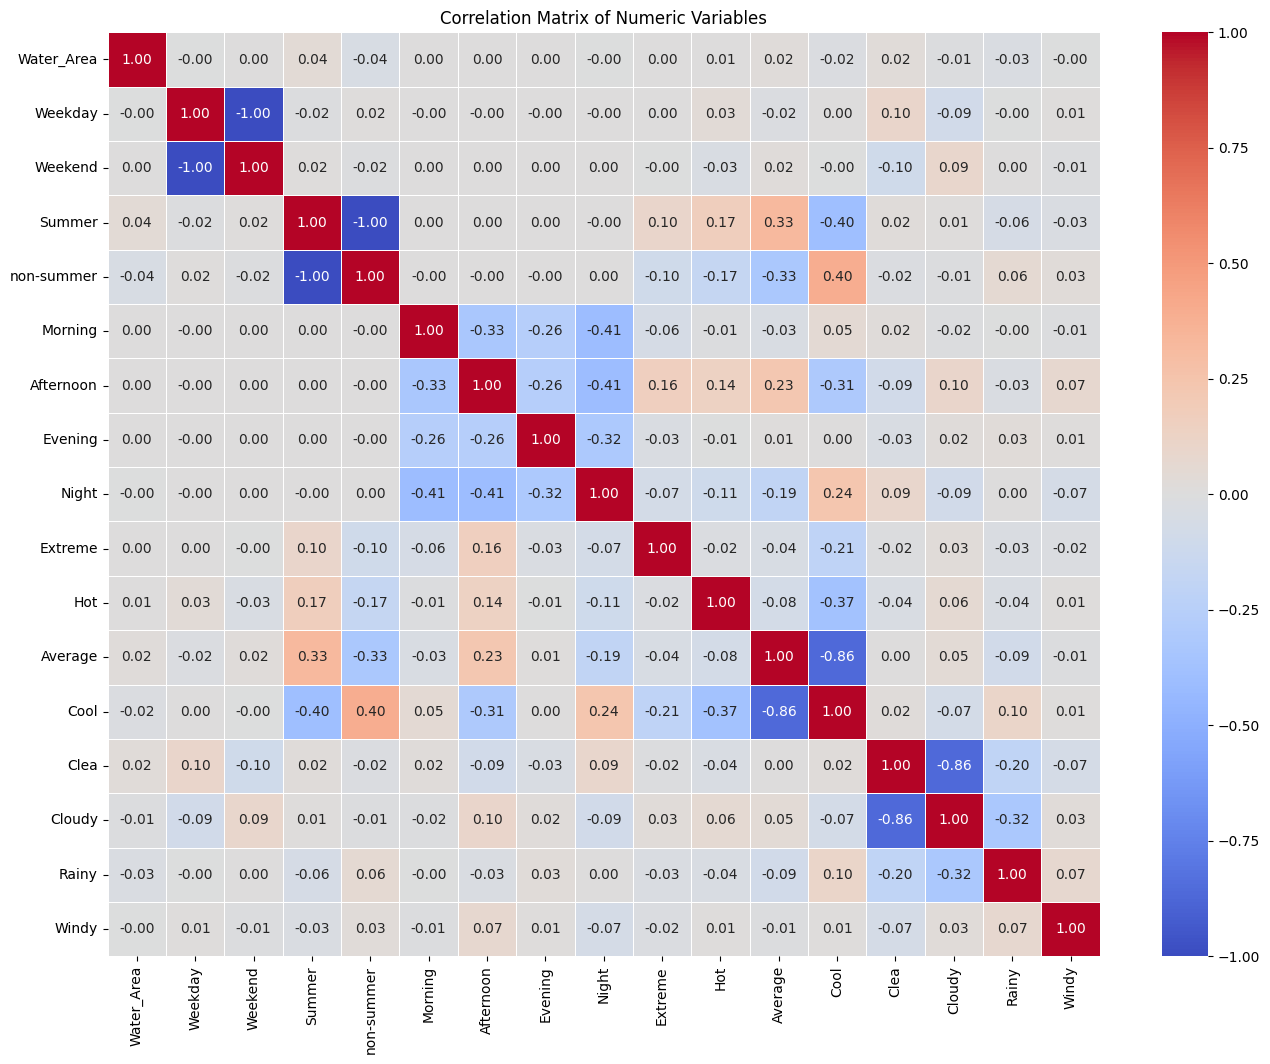

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xtable1K=XtableK.drop(columns=['Holiday', 'Shaded_Area_Minimal ', 'Shaded_Area_Partial ',
       'Shaded_Area_Fully', 'Athletic_Zone', 'Nature_and_Trail_Zone','Visits', 'Z_Score_row'])

# 选择数值型变量进行相关性计算
numeric_cols = Xtable1K.select_dtypes(include=[np.number])

# 计算相关性矩阵
correlation_matrix = numeric_cols.corr()

# 绘制相关性热图
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


##AIC 特征循环

In [ ]:
# #Xtable1 = Xtable.drop(columns=['Z_Score_row','Event_bin','Holiday_bin'])
# Xtable1 = Xtable.drop(columns=['Z_Score_row','Event_z'])
# #Xtable1 = Xtable.drop(columns=['Visits','Event_z'])

# import statsmodels.api as sm

# def aic_based_selection(df, target):
#     """
#     基于最小AIC的特征选择
#     """
#     remaining = df.columns.drop(target).tolist()
#     selected = []
#     best_aic = float('inf')

#     while remaining:
#         best_feature = None
#         for feature in remaining:
#             trial = selected + [feature]
#             X = sm.add_constant(df[trial])
#             y = df[target]
#             model = sm.OLS(y, X).fit()
#             aic = model.aic
#             if aic < best_aic:
#                 best_aic = aic
#                 best_feature = feature
#         if best_feature:
#             selected.append(best_feature)
#             remaining.remove(best_feature)
#         else:
#             break
#     return selected

# # 使用示例
# best_aic_features = aic_based_selection(Xtable1, target='Visits')

# best_aic_features

In [ ]:
# from itertools import combinations

# def enforce_weather_features(df, target, weather_features=['Extreme', 'Hot', 'Average', 'Cool'], p_threshold=0.05):
#     """
#     强制选择3个天气变量，其他变量按p值筛选
#     :param df: 数据框
#     :param target: 目标变量名（如'Visits'）
#     :param weather_features: 需要强制包含的天气变量列表
#     :param p_threshold: 其他变量的p值阈值
#     :return: 最佳模型和选择的特征列表
#     """
#     # 生成所有3个天气变量的组合
#     weather_combos = list(combinations(weather_features, 2))
#     best_model = None
#     best_features = []

#     # 遍历所有天气组合
#     for weather_combo in weather_combos:
#         # 强制包含的天气变量
#         forced_features = list(weather_combo)
#         remaining_features = df.columns.drop([target] + weather_features).tolist()

#         # 初始化模型
#         selected_features = forced_features.copy()
#         X = sm.add_constant(df[selected_features])
#         y = df[target]
#         model = sm.OLS(y, X).fit()

#         # 前向逐步筛选其他变量
#         for feature in remaining_features:
#             # 临时加入新特征
#             trial_features = selected_features + [feature]
#             X_trial = sm.add_constant(df[trial_features])

#             try:
#                 trial_model = sm.OLS(y, X_trial).fit()
#                 p_value = trial_model.pvalues[feature]

#                 # 检查新特征的p值是否达标
#                 if p_value < p_threshold:
#                     selected_features.append(feature)
#                     model = trial_model
#             except:
#                 continue  # 跳过导致共线性的变量

#         # 记录最佳组合（以模型AIC为准则）
#         if best_model is None or model.aic < best_model.aic:
#             best_model = model
#             best_features = selected_features

#     return best_model, best_features

# # 使用示例
# if __name__ == "__main__":
#     # 假设Xtable包含目标变量'Visits'和其他特征
#     final_model, final_features = enforce_weather_features(Xtable1, target='Visits')

#     print("\n=== 强制包含的天气变量 ===")
#     weather_vars = [f for f in final_features if f in ['Extreme', 'Hot', 'Average', 'Cool']]
#     print(weather_vars)

#     print("\n=== 最终选择的特征 ===")
#     print(final_features)

#     print("\n=== 模型摘要 ===")
#     print(final_model.summary())

## VIF

### Visits~Event_bin

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = [
    'Shaded_Area_Minimal',
      #  'Shaded_Area_Partial',
      #  'Shaded_Area_Fully',
        'Water_Area',
    #  'non_water_area',
        'Weekend',
       'Summer',
        'Morning',
        # 'Afternoon',
        #  'Night',
        'Evening',
        'Extreme',
       'Hot',
        'Average',
        # 'Cool',
        #  'Clear',
     'Cloudy',
    'Rainy',
        'Windy',
    #  'non_windy',
    'Large_Event',
    'Small_Event',
    # 'non_event',
      #  'Plaza_Zone'
        ]

vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

                feature       VIF
0   Shaded_Area_Minimal  1.468702
1            Water_Area  3.202396
2               Weekend  1.461154
3                Summer  2.666914
4               Morning  1.777544
5               Evening  1.514473
6               Extreme  1.083081
7                   Hot  1.182952
8               Average  1.621011
9                Cloudy  2.335231
10                Rainy  1.172748
11                Windy  1.040244
12          Large_Event  1.041208
13          Small_Event  1.012013


In [ ]:
from re import X

selected_columns_ols = selected_columns_vif
# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     364.3
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:43:51   Log-Likelihood:            -1.0727e+05
No. Observations:               11424   AIC:                         2.146e+05
Df Residuals:                   11409   BIC:                         2.147e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1597.7903     84.371     18.938      0.000    1432.409    1763.171
Shaded_Area_Minimal  -317.6069     67.704     -4.691      0.000    -450.318    -184.896
Water_Area          -1102.1972     65.753    -16.763      0.000   -1231.085    -973.310
Weekend               816.2640     59.621     13.691      0.000     699.396     933.132
Summer                221.0166     62.981      3.509      0.000      97.564     344.469
Morning              -777.8152     65.722    -11.835      0.000    -906.641    -648.989
Evening               174.6365     72.005      2.425      0.015      33.495     315.778
Extreme              -480.1169    230.764     -2.081      0.037    -932.454     -27.779
Hot                  -277.0081    141.246     -1.961      0.050    -553.875      -0.141
Average               -77.6926     79.807     -0.974      0.330    -234.128      78.743
Cloudy               -254.2291     60.272     -4.218      0.000    -372.373    -136.085
Rainy                -527.3739    112.086     -4.705      0.000    -747.083    -307.665
Windy                -466.3650    161.481     -2.888      0.004    -782.896    -149.834
Large_Event          1.571e+04    252.514     62.223      0.000    1.52e+04    1.62e+04
Small_Event           419.7690    466.600      0.900      0.368    -494.847    1334.385
==============================================================================
Omnibus:                    23178.145   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88986370.873
Skew:                          16.775   Prob(JB):                         0.00
Kurtosis:                     434.069   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coef_df = pd.DataFrame({
    "Variable": T1m.params.index,  # Get the variable names from the model
    "Coefficient": T1m.params.values,  # Get the coefficients
    "Lower CI": T1m.conf_int()[0].values,  # Lower bound of the confidence interval
    "Upper CI": T1m.conf_int()[1].values   # Upper bound of the confidence interval
})

# Display the DataFrame
print(coef_df)

               Variable   Coefficient      Lower CI      Upper CI
0             Intercept   1597.790297   1432.409262   1763.171332
1   Shaded_Area_Minimal   -317.606855   -450.318155   -184.895555
2            Water_Area  -1102.197173  -1231.084635   -973.309711
3               Weekend    816.263953    699.395728    933.132178
4                Summer    221.016603     97.563710    344.469496
5               Morning   -777.815247   -906.641318   -648.989176
6               Evening    174.636511     33.494968    315.778053
7               Extreme   -480.116855   -932.454383    -27.779327
8                   Hot   -277.008051   -553.874628     -0.141474
9               Average    -77.692633   -234.127838     78.742572
10               Cloudy   -254.229128   -372.373167   -136.085089
11                Rainy   -527.373930   -747.082711   -307.665148
12                Windy   -466.364992   -782.896051   -149.833934
13          Large_Event  15712.063084  15217.092338  16207.033830
14        

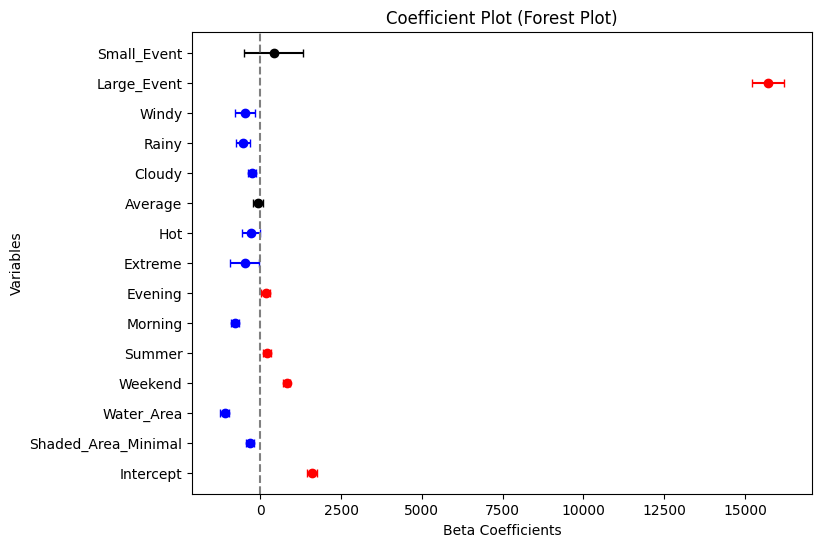

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤掉 Intercept（如果需要）
coef_df = coef_df[coef_df["Variable"] != "const"]

# 创建画布
plt.figure(figsize=(8, 6))

# 遍历每个变量，手动绘制不同颜色的误差条
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # 判断颜色：
    if lower_bound > 0:  # 完全在右侧（正值）
        color = "red"
    elif upper_bound < 0:  # 完全在左侧（负值）
        color = "blue"
    else:  # 误差条跨过 0 轴
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# 添加参考线
plt.axvline(x=0, linestyle="--", color="gray")

# 设置标签和标题
plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")

# 显示图表
plt.show()


### Visits~Event_z

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = [
    'Shaded_Area_Minimal',
      #  'Shaded_Area_Partial',
      #  'Shaded_Area_Fully',
        'Water_Area',
        'Weekend',
      #  'Spring',
       'Summer',
        # 'Fall',
        # 'Morning',
        'Afternoon',
         'Night',
        'Evening',
        'Extreme',
       'Hot',
        # 'Average',
        # 'Cool',
        'Clear_Partly_Cloudy',
      #  'Cloudy_Low_Visibility',
        'Light_Moderate_Rain',
       'Heavy_Rain_Thunderstorms',
        'Windy','Holiday','Event_z',
      #  'Athletic_Zone',
        # 'Plaza_Zone',
        'Recreation_Zone',
        # 'Water_Front_Zone'
        ]

vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

                     feature       VIF
0        Shaded_Area_Minimal  1.930485
1                 Water_Area  4.602879
2                    Weekend  1.341379
3                     Summer  1.954254
4                  Afternoon  1.597692
5                      Night  1.783634
6                    Evening  1.370242
7                    Extreme  1.051464
8                        Hot  1.094965
9        Clear_Partly_Cloudy  1.504030
10       Light_Moderate_Rain  1.100355
11  Heavy_Rain_Thunderstorms  1.015236
12                     Windy  1.038575
13                   Holiday  1.021458
14                   Event_z  1.029295
15           Recreation_Zone  2.002502


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = selected_columns_vif
# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     514.0
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        04:11:06   Log-Likelihood:            -1.5762e+05
No. Observations:               17136   AIC:                         3.153e+05
Df Residuals:                   17119   BIC:                         3.154e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  667.8260     55.448     12.044      0.000     559.143     776.509
Shaded_Area_Minimal       -223.0603     52.321     -4.263      0.000    -325.616    -120.505
Water_Area                -705.8875     51.167    -13.796      0.000    -806.180    -605.596
Weekend                      2.2595     40.463      0.056      0.955     -77.052      81.571
Summer                     123.7873     37.691      3.284      0.001      49.909     197.666
Afternoon                  691.1432     52.604     13.139      0.000     588.034     794.252
Night                     -242.8332     48.440     -5.013      0.000    -337.782    -147.885
Evening                    890.6366     57.826     15.402      0.000     777.291    1003.982
Extreme                   -241.9008    187.019     -1.293      0.196    -608.478     124.677
Hot                       -186.4414    108.886     -1.712      0.087    -399.869      26.986
Clear_Partly_Cloudy         55.5236     39.657      1.400      0.162     -22.209     133.256
Light_Moderate_Rain        -74.5606     74.504     -1.001      0.317    -220.596      71.475
Heavy_Rain_Thunderstorms  -209.9917    235.138     -0.893      0.372    -670.886     250.903
Windy                     -180.5842    124.203     -1.454      0.146    -424.034      62.866
Holiday                    131.3428    123.569      1.063      0.288    -110.866     373.551
Event_z                   2198.0960     26.436     83.147      0.000    2146.278    2249.914
Recreation_Zone           -132.3650     51.195     -2.586      0.010    -232.713     -32.017
==============================================================================
Omnibus:                    36128.163   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        211057525.110
Skew:                          18.232   Prob(JB):                         0.00
Kurtosis:                     545.466   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Z-score Row ~ Event_bin

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = [
    'Shaded_Area_Minimal',
      #  'Shaded_Area_Partial',
      #  'Shaded_Area_Fully',
        'Water_Area',
        'Weekend',
       'Summer',
        'Morning',
        'Afternoon',
        #  'Night',
        'Evening',
        'Extreme',
       'Hot',
        'Average',
        # 'Cool',
        #  'Clear',
     'Cloudy',
    'Rainy',
        'Windy',
    'Large_Event',
    'Small_Event',
       'Recreation_Zone'
        ]

vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

                feature       VIF
0   Shaded_Area_Minimal  1.942098
1            Water_Area  4.597724
2               Weekend  1.432558
3                Summer  2.231146
4               Morning  1.533182
5             Afternoon  1.809710
6               Evening  1.382066
7               Extreme  1.070447
8                   Hot  1.135609
9               Average  1.498943
10               Cloudy  2.316230
11                Rainy  1.174039
12                Windy  1.041930
13          Large_Event  1.041537
14          Small_Event  1.011614
15      Recreation_Zone  2.008958


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = selected_columns_vif
# Create formula string
formula = 'Z_Score_row ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Z_Score_row   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1507.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:31:22   Log-Likelihood:                -16736.
No. Observations:               17136   AIC:                         3.351e+04
Df Residuals:                   17119   BIC:                         3.364e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.5018      0.015    -33.903      0.000      -0.531      -0.473
Shaded_Area_Minimal     0.0679      0.014      4.811      0.000       0.040       0.096
Water_Area             -0.0571      0.014     -4.151      0.000      -0.084      -0.030
Weekend                 0.8998      0.011     83.703      0.000       0.879       0.921
Summer                  0.3692      0.011     33.751      0.000       0.348       0.391
Morning                 0.0531      0.013      4.056      0.000       0.027       0.079
Afternoon               0.0861      0.014      6.113      0.000       0.059       0.114
Evening                 0.0605      0.015      4.061      0.000       0.031       0.090
Extreme                -0.3114      0.051     -6.132      0.000      -0.411      -0.212
Hot                    -0.2509      0.030     -8.393      0.000      -0.309      -0.192
Average                -0.0476      0.016     -3.006      0.003      -0.079      -0.017
Cloudy                 -0.0666      0.011     -6.219      0.000      -0.088      -0.046
Rainy                  -0.2524      0.020    -12.558      0.000      -0.292      -0.213
Windy                  -0.1898      0.033     -5.682      0.000      -0.255      -0.124
Large_Event             4.4642      0.041    108.825      0.000       4.384       4.545
Small_Event             2.5252      0.090     28.152      0.000       2.349       2.701
Recreation_Zone         0.0831      0.014      6.024      0.000       0.056       0.110
==============================================================================
Omnibus:                     6660.037   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101061.690
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                      14.536   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coef_df = pd.DataFrame({
    "Variable": T1m.params.index,  # Get the variable names from the model
    "Coefficient": T1m.params.values,  # Get the coefficients
    "Lower CI": T1m.conf_int()[0].values,  # Lower bound of the confidence interval
    "Upper CI": T1m.conf_int()[1].values   # Upper bound of the confidence interval
})

# Display the DataFrame
print(coef_df)

               Variable  Coefficient  Lower CI  Upper CI
0             Intercept    -0.501787 -0.530798 -0.472776
1   Shaded_Area_Minimal     0.067877  0.040221  0.095534
2            Water_Area    -0.057144 -0.084128 -0.030160
3               Weekend     0.899797  0.878726  0.920867
4                Summer     0.369194  0.347753  0.390635
5               Morning     0.053095  0.027435  0.078755
6             Afternoon     0.086117  0.058504  0.113731
7               Evening     0.060506  0.031300  0.089711
8               Extreme    -0.311357 -0.410885 -0.211828
9                   Hot    -0.250898 -0.309492 -0.192305
10              Average    -0.047631 -0.078689 -0.016574
11               Cloudy    -0.066628 -0.087627 -0.045629
12                Rainy    -0.252361 -0.291750 -0.212973
13                Windy    -0.189793 -0.255263 -0.124322
14          Large_Event     4.464218  4.383810  4.544625
15          Small_Event     2.525207  2.349389  2.701024
16      Recreation_Zone     0.0

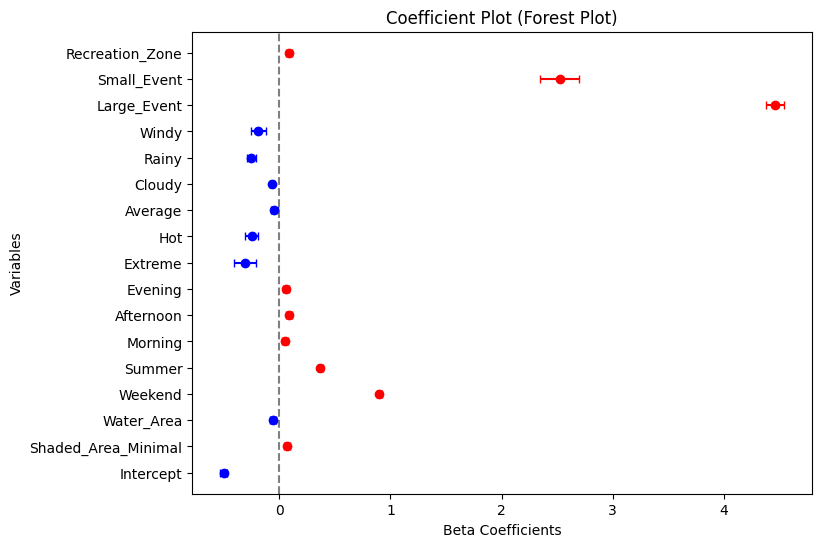

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤掉 Intercept（如果需要）
coef_df = coef_df[coef_df["Variable"] != "const"]

# 创建画布
plt.figure(figsize=(8, 6))

# 遍历每个变量，手动绘制不同颜色的误差条
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # 判断颜色：
    if lower_bound > 0:  # 完全在右侧（正值）
        color = "red"
    elif upper_bound < 0:  # 完全在左侧（负值）
        color = "blue"
    else:  # 误差条跨过 0 轴
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# 添加参考线
plt.axvline(x=0, linestyle="--", color="gray")

# 设置标签和标题
plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")

# 显示图表
plt.show()


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = ['Weekday', 'Summer',
       'Fall', 'Morning', 'Evening', 'Night', 'Extreme',
       'Average', 'Cool', 'Clear_Partly_Cloudy', 'Cloudy_Low_Visibility',
       'Light_Moderate_Rain', 'Windy',
       'Event_z']
# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     379.8
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:55:01   Log-Likelihood:                -35731.
No. Observations:                4368   AIC:                         7.149e+04
Df Residuals:                    4353   BIC:                         7.159e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               553.0314    185.725      2.978      0.003     188.917     917.146
Weekday                  -6.2960     28.998     -0.217      0.828     -63.148      50.556
Summer                   51.5065     32.394      1.590      0.112     -12.001     115.014
Fall                   -111.3859     40.312     -2.763      0.006    -190.418     -32.354
Morning                -672.7317     38.560    -17.446      0.000    -748.329    -597.135
Evening                 163.8028     42.379      3.865      0.000      80.718     246.887
Night                  -883.3953     37.536    -23.534      0.000    -956.986    -809.805
Extreme                 -91.3003    152.445     -0.599      0.549    -390.171     207.570
Average                 251.7634     83.093      3.030      0.002      88.859     414.668
Cool                     61.1447     80.499      0.760      0.448     -96.674     218.963
Clear_Partly_Cloudy     198.7154    168.709      1.178      0.239    -132.040     529.471
Cloudy_Low_Visibility   236.0984    167.883      1.406      0.160     -93.037     565.234
Light_Moderate_Rain     114.6429    174.499      0.657      0.511    -227.464     456.750
Windy                   -55.3595     86.189     -0.642      0.521    -224.334     113.615
Event_z                 970.0857     15.322     63.315      0.000     940.047    1000.124
==============================================================================
Omnibus:                     3328.775   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           552666.332
Skew:                           2.761   Prob(JB):                         0.00
Kurtosis:                      57.828   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = ['Weekday', 'Summer',
       'Fall', 'Morning', 'Evening', 'Night', 'Extreme',
       'Average', 'Cool', 'Clear_Partly_Cloudy', 'Cloudy_Low_Visibility',
       'Light_Moderate_Rain', 'Windy',
       'Event_bin', 'Holiday_bin']
# Create formula string
formula = 'Z_Score_row ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Z_Score_row   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          2.86e-160
Time:                        18:54:09   Log-Likelihood:                -5786.5
No. Observations:                4368   AIC:                         1.160e+04
Df Residuals:                    4352   BIC:                         1.171e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3171      0.196      1.621      0.105      -0.066       0.701
Weekday                  -0.8949      0.031    -29.282      0.000      -0.955      -0.835
Summer                   -0.0014      0.034     -0.041      0.967      -0.068       0.065
Fall                      0.0276      0.043      0.643      0.520      -0.057       0.112
Morning                   0.0111      0.041      0.273      0.785      -0.069       0.091
Evening                   0.0010      0.045      0.022      0.983      -0.087       0.089
Night                     0.0196      0.040      0.490      0.624      -0.059       0.098
Extreme                   0.0038      0.161      0.023      0.981      -0.311       0.319
Average                   0.1624      0.088      1.854      0.064      -0.009       0.334
Cool                      0.1046      0.085      1.236      0.217      -0.061       0.271
Clear_Partly_Cloudy       0.1666      0.178      0.937      0.349      -0.182       0.515
Cloudy_Low_Visibility     0.2192      0.177      1.239      0.215      -0.128       0.566
Light_Moderate_Rain       0.1736      0.184      0.944      0.345      -0.187       0.534
Windy                     0.1146      0.091      1.263      0.207      -0.063       0.293
Event_bin                -0.1611      0.114     -1.409      0.159      -0.385       0.063
Holiday_bin               0.1945      0.109      1.784      0.075      -0.019       0.408
==============================================================================
Omnibus:                     4670.850   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274146.409
Skew:                           5.513   Prob(JB):                         0.00
Kurtosis:                      40.212   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

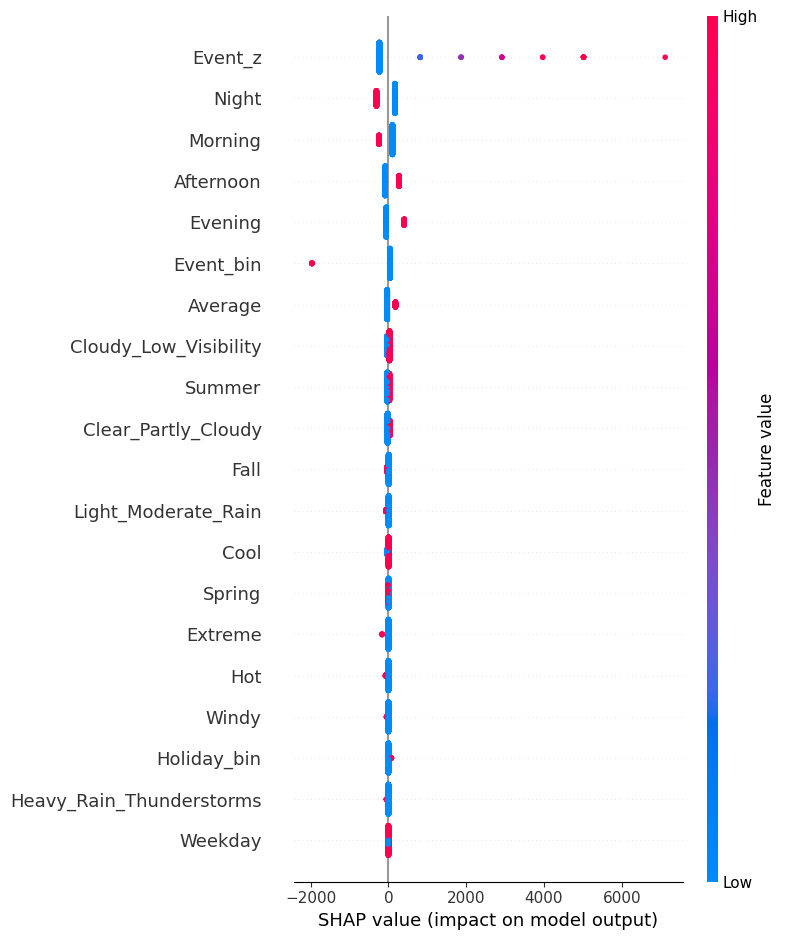

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 假设 Xtable 已经加载到内存，且包含所有变量
features = ['Weekday', 'Weekend', 'Spring', 'Summer', 'Fall', 'Morning', 'Afternoon',
            'Evening', 'Night', 'Extreme', 'Hot', 'Average', 'Cool', 'Clear_Partly_Cloudy',
            'Cloudy_Low_Visibility', 'Light_Moderate_Rain', 'Heavy_Rain_Thunderstorms',
            'Windy', 'Event_z', 'Event_bin', 'Holiday_bin']

# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Visits']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型（可根据需要调整 alpha）
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 使用 SHAP 的 LinearExplainer（适用于线性模型）
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 总结图，展示各特征对预测的贡献情况
shap.summary_plot(shap_values, X_test)

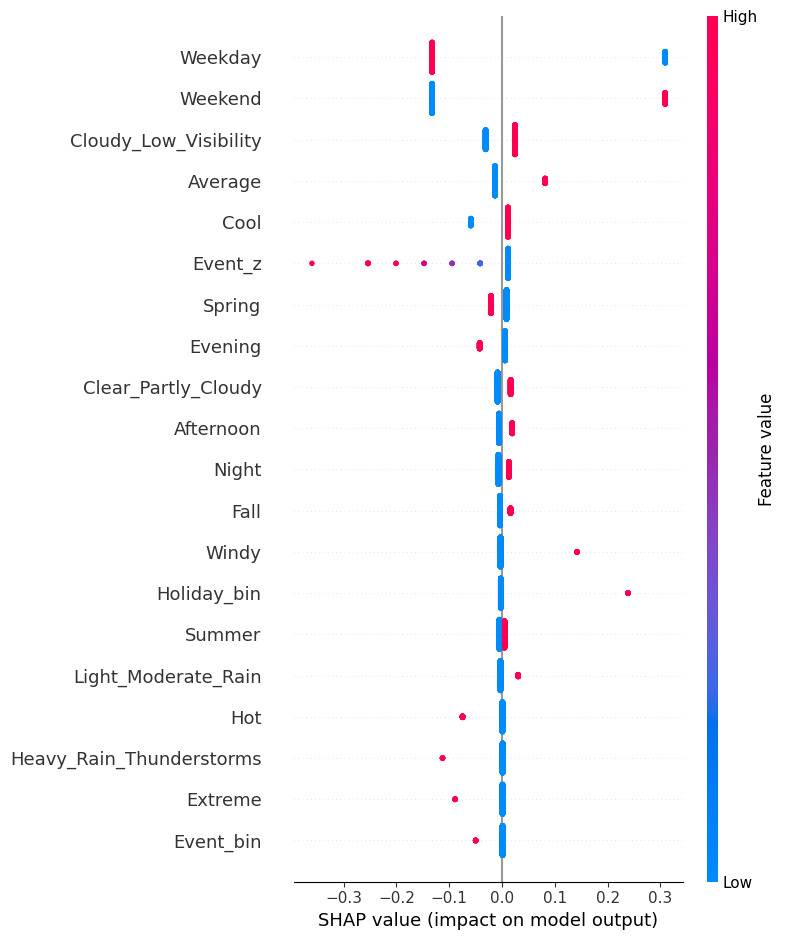

In [ ]:
# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Z_Score_row']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型（可根据需要调整 alpha）
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 使用 SHAP 的 LinearExplainer（适用于线性模型）
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 总结图，展示各特征对预测的贡献情况
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Z_Score_row']

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型，设置正则化参数 alpha（可调节）
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 在测试集上预测，并计算均方误差（MSE）
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 使用 GridSearchCV 对正则化参数 alpha 进行调优
alphas = np.logspace(-3, 3, 50)  # 从0.001到1000之间50个候选值
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.best_params_)

# 使用最优参数构建模型，并在测试集上评价
best_model = ridge_cv.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("MSE with best model:", mse_best)

MSE: 0.7984366688237057
Best alpha: {'alpha': 59.636233165946365}
MSE with best model: 0.797941655203306


In [ ]:
# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Visits']

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型，设置正则化参数 alpha（可调节）
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 在测试集上预测，并计算均方误差（MSE）
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 使用 GridSearchCV 对正则化参数 alpha 进行调优
alphas = np.logspace(-3, 3, 50)  # 从0.001到1000之间50个候选值
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.best_params_)

# 使用最优参数构建模型，并在测试集上评价
best_model = ridge_cv.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("MSE with best model:", mse_best)

MSE: 558985.8312606071
Best alpha: {'alpha': 0.001}
MSE with best model: 559335.3710302785
